## Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [2]:
### Define the Classification Target
df["pass_fail"] = (df["math score"] >= 40).astype(int)


In [3]:
df[["math score", "pass_fail"]].head()


,math score,pass_fail
0,67,1
1,40,1
2,59,1
3,77,1
4,78,1


In [4]:
### Select Features
X = df[["reading score", "writing score"]].values
y = df["pass_fail"].values.reshape(-1, 1)


In [5]:
## spliting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
## feature scaling
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [8]:
def predict_proba(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)


In [9]:
def compute_loss(y, y_hat):
    eps = 1e-9  # prevent log(0)
    return -np.mean(
        y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps)
    )


In [10]:
def gradient_descent_logistic(X, y, lr=0.1, epochs=2000):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, 1))
    b = 0

    for i in range(epochs):
        y_hat = predict_proba(X, W, b)

        dW = (1 / n_samples) * np.dot(X.T, (y_hat - y))
        db = (1 / n_samples) * np.sum(y_hat - y)

        W -= lr * dW
        b -= lr * db

        if i % 200 == 0:
            loss = compute_loss(y, y_hat)
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W, b


In [11]:
W, b = gradient_descent_logistic(
    X_train_scaled,
    y_train,
    lr=0.1,
    epochs=2000
)


Epoch 0, Loss: 0.6931
Epoch 200, Loss: 0.1367
Epoch 400, Loss: 0.1114
Epoch 600, Loss: 0.1021
Epoch 800, Loss: 0.0972
Epoch 1000, Loss: 0.0942
Epoch 1200, Loss: 0.0921
Epoch 1400, Loss: 0.0907
Epoch 1600, Loss: 0.0896
Epoch 1800, Loss: 0.0888


In [12]:
def predict_class(X, W, b, threshold=0.5):
    probs = predict_proba(X, W, b)
    return (probs >= threshold).astype(int)


In [13]:
y_pred = predict_class(X_test_scaled, W, b)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.96


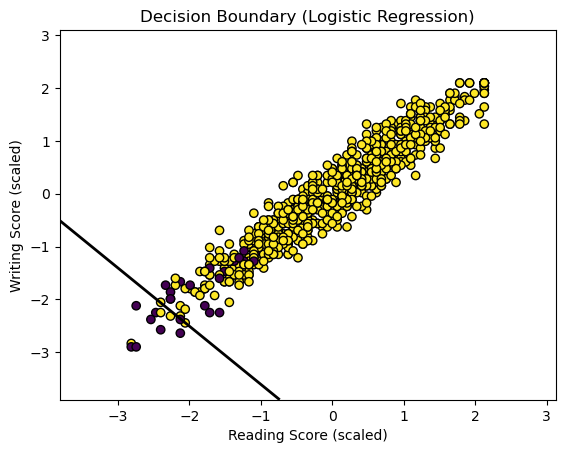

In [14]:
x_min, x_max = X_train_scaled[:,0].min()-1, X_train_scaled[:,0].max()+1
y_min, y_max = X_train_scaled[:,1].min()-1, X_train_scaled[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_proba(grid, W, b).reshape(xx.shape)

# plt.contourf(xx, yy, probs, alpha=0.3)
plt.contourf(
    xx, yy, probs,
    levels=[0, 0.5, 1],
    colors=['lightblue', 'lightcoral'],
    alpha=0
)
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train.flatten(), edgecolor='k')
plt.xlabel("Reading Score (scaled)")
plt.ylabel("Writing Score (scaled)")
plt.title("Decision Boundary (Logistic Regression)")
plt.show()


In [15]:
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN


In [16]:
TP, TN, FP, FN = confusion_matrix_manual(y_test, y_pred)

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)


TP: 189
TN: 3
FP: 6
FN: 2


In [17]:
accuracy = (TP + TN) / (TP + TN + FP + FN)


In [18]:
precision = TP / (TP + FP)


In [19]:
recall = TP / (TP + FN)


In [20]:
f1 = 2 * precision * recall / (precision + recall)


In [21]:
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.96
Precision: 0.9692307692307692
Recall   : 0.9895287958115183
F1 Score : 0.9792746113989638


### POLYNOMIAL LOGISTIC REGRESSION

In [22]:
X_train_scaled.shape

(800, 2)

In [23]:
def polynomial_features_degree2(X):
    x1 = X[:, 0].reshape(-1, 1)
    x2 = X[:, 1].reshape(-1, 1)

    return np.hstack([
        x1,
        x2,
        x1**2,
        x2**2,
        x1 * x2
    ])


In [24]:
X_train_poly = polynomial_features_degree2(X_train_scaled)
X_test_poly = polynomial_features_degree2(X_test_scaled)

X_train_poly.shape
# (n_samples, 5)


(800, 5)

In [25]:
W = np.zeros((X_train_poly.shape[1], 1))
b = 0

W, b = gradient_descent_logistic(
    X_train_poly,
    y_train,
    lr=0.1,
    epochs=3000
)


Epoch 0, Loss: 0.6931
Epoch 200, Loss: 0.1427
Epoch 400, Loss: 0.1100
Epoch 600, Loss: 0.0998
Epoch 800, Loss: 0.0952
Epoch 1000, Loss: 0.0927
Epoch 1200, Loss: 0.0911
Epoch 1400, Loss: 0.0901
Epoch 1600, Loss: 0.0893
Epoch 1800, Loss: 0.0888
Epoch 2000, Loss: 0.0883
Epoch 2200, Loss: 0.0880
Epoch 2400, Loss: 0.0877
Epoch 2600, Loss: 0.0874
Epoch 2800, Loss: 0.0872


In [26]:
y_pred_poly = predict_class(X_test_poly, W, b)

accuracy_poly = np.mean(y_pred_poly == y_test)
print("Polynomial Logistic Accuracy:", accuracy_poly)


Polynomial Logistic Accuracy: 0.96


In [27]:
def plot_decision_boundary(X_scaled, y, W, b, title):
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = polynomial_features_degree2(grid)

    probs = predict_proba(grid_poly, W, b).reshape(xx.shape)

    # Probability regions
    plt.contourf(xx, yy, probs, levels=20, alpha=0.3)

    # Decision boundary (p = 0.5)
    plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)

    # Data points
    plt.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=y.flatten(),
        edgecolor='k'
    )

    plt.xlabel("Reading Score (scaled)")
    plt.ylabel("Writing Score (scaled)")
    plt.title(title)
    plt.show()


### L2 REGULARIZATION

In [28]:
### Regularized Gradient Descent
def gradient_descent_logistic_l2(X, y, lr=0.1, epochs=3000, lam=0.1):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, 1))
    b = 0

    for i in range(epochs):
        y_hat = predict_proba(X, W, b)

        dW = (1 / n_samples) * np.dot(X.T, (y_hat - y)) + (lam / n_samples) * W
        db = (1 / n_samples) * np.sum(y_hat - y)

        W -= lr * dW
        b -= lr * db

        if i % 300 == 0:
            loss = compute_loss(y, y_hat)
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W, b


In [29]:
W_reg, b_reg = gradient_descent_logistic_l2(
    X_train_poly,
    y_train,
    lr=0.1,
    epochs=3000,
    lam=0.5
)


Epoch 0, Loss: 0.6931
Epoch 300, Loss: 0.1208
Epoch 600, Loss: 0.0999
Epoch 900, Loss: 0.0939
Epoch 1200, Loss: 0.0912
Epoch 1500, Loss: 0.0898
Epoch 1800, Loss: 0.0889
Epoch 2100, Loss: 0.0883
Epoch 2400, Loss: 0.0878
Epoch 2700, Loss: 0.0875


In [30]:
y_pred_reg = predict_class(X_test_poly, W_reg, b_reg)

accuracy_reg = np.mean(y_pred_reg == y_test)
print("Regularized Polynomial Accuracy:", accuracy_reg)


Regularized Polynomial Accuracy: 0.96


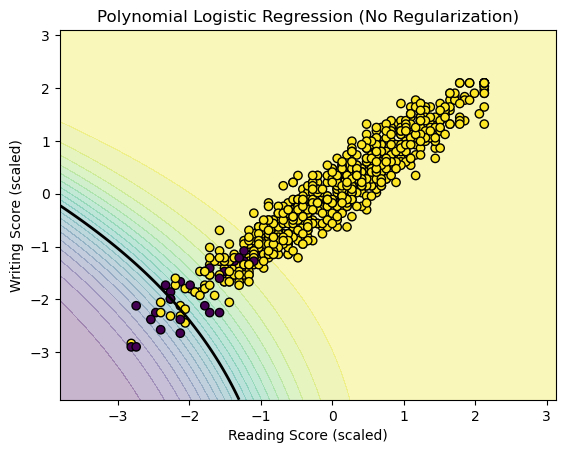

In [31]:
plot_decision_boundary(
    X_train_scaled,
    y_train,
    W,
    b,
    "Polynomial Logistic Regression (No Regularization)"
)


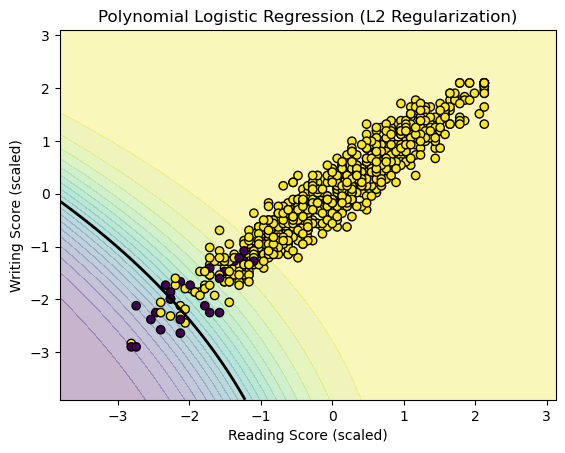

In [32]:
plot_decision_boundary(
    X_train_scaled,
    y_train,
    W_reg,
    b_reg,
    "Polynomial Logistic Regression (L2 Regularization)"
)


### Comparing My scratch model with sklearn implementation

In [33]:
X_train_poly = polynomial_features_degree2(X_train_scaled)
X_test_poly = polynomial_features_degree2(X_test_scaled)


In [34]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression(
    penalty="l2",        # L2 regularization
    C=1.0,               # inverse of lambda
    solver="lbfgs",
    max_iter=500
)

sk_model.fit(X_train_poly, y_train.ravel())


LogisticRegression(max_iter=500)

In [35]:
y_pred_sk = sk_model.predict(X_test_poly)

accuracy_sk = np.mean(y_pred_sk == y_test.ravel())
print("Sklearn Accuracy:", accuracy_sk)


Sklearn Accuracy: 0.96


In [36]:
W_reg.flatten()


array([ 0.90214153,  0.88496234, -0.09772969,  0.04076424, -0.21360093])

In [37]:
sk_model.coef_.flatten()


array([ 1.28800574,  1.33511937, -0.08050642,  0.05173493, -0.01948735])

In [38]:
proba_scratch = predict_proba(X_test_poly, W_reg, b_reg)
proba_sk = sk_model.predict_proba(X_test_poly)[:, 1].reshape(-1, 1)

print("First 5 probabilities (scratch):")
print(proba_scratch[:5].flatten())

print("First 5 probabilities (sklearn):")
print(proba_sk[:5])


First 5 probabilities (scratch):
[0.99854833 0.99841874 0.94378041 0.99939975 0.99657137]
First 5 probabilities (sklearn):
[[0.99974103]
 [0.99969357]
 [0.94845567]
 [0.99995969]
 [0.99879649]]


In [39]:
def plot_decision_boundary_sklearn(X_scaled, y, model, title):
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = polynomial_features_degree2(grid)

    probs = model.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, probs, levels=20, alpha=0.3)
    plt.contour(xx, yy, probs, levels=[0.5], colors="black", linewidths=2)
    # Data points
    plt.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=y.flatten(),
        edgecolors="k"
    )

    plt.xlabel("Reading Score (scaled)")
    plt.ylabel("Writing Score (scaled)")
    plt.title(title)
    plt.show()


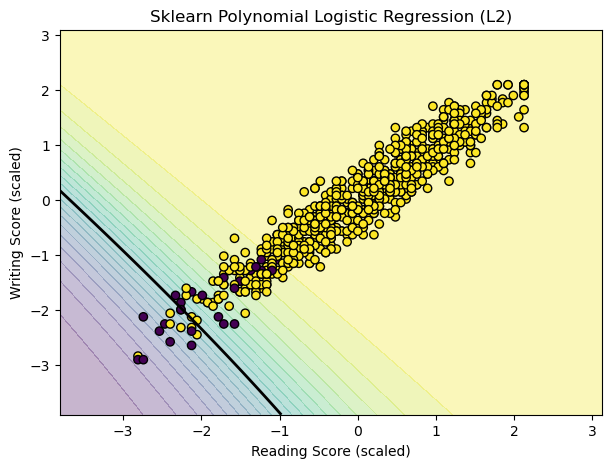

In [40]:
plot_decision_boundary_sklearn(
    X_train_scaled,
    y_train,
    sk_model,
    "Sklearn Polynomial Logistic Regression (L2)"
)
